## Ejercicio analisis no supervisado
Fase 4 analisis de datos, k-nime y HC

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("G:/Otros ordenadores/Portátil/UNAD/Semestre 6/Análisis de datos/4/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

no se encontraton valores nulos en la data dada

In [6]:
df.shape

(200, 5)

la data tiene 200 filas de datos con 5 columnas de datos descriptivos

In [8]:
df=df.drop(['Gender'], axis=1)
df=df.drop(['CustomerID'], axis=1)

Eliminamos la columna de la variable Gender y CustomerID

In [10]:
## matriz de correlacion
corr_matrix=df.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Numericamente se observa que no hay correlacion entre las variables que quedan, es decir no hay una relacion lineal

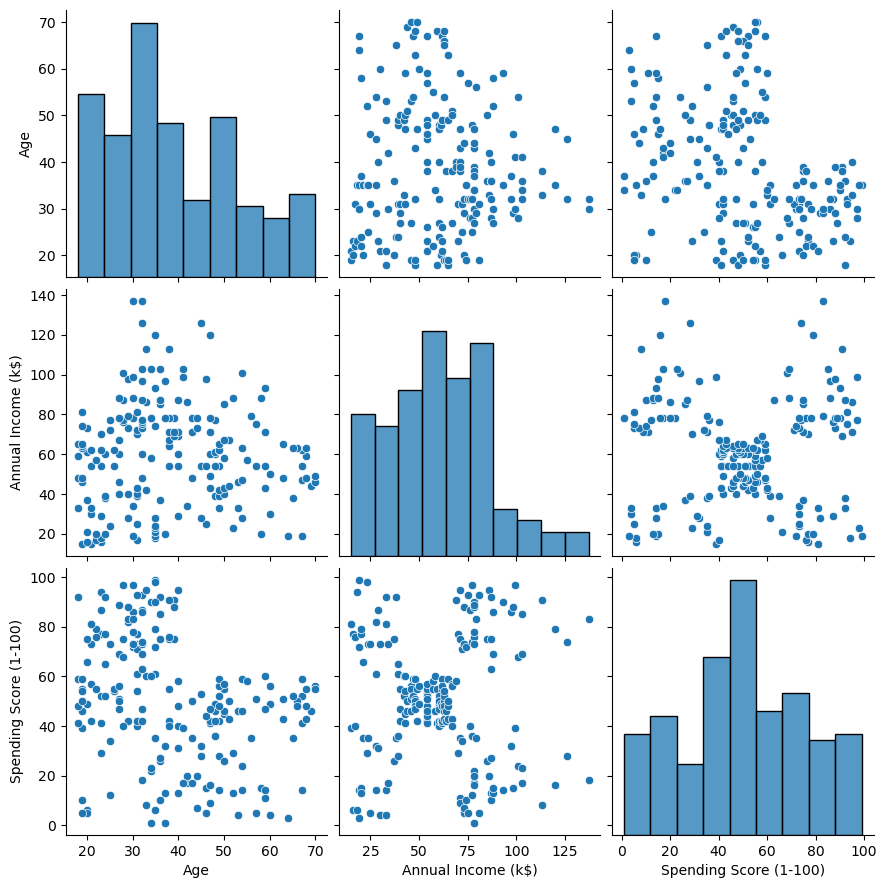

In [12]:
sns.pairplot(df.dropna(), size=3,kind='scatter')

Graficamente si se ve que hay tendencia de agrupamiento de 5 sectores entre las variables "Annual Income" y "Spending Score", pueda que no sea una relacion lineal y por esto en la matriz de correlacion no se ve alguna relacion entre estas dos variables

In [14]:
df=df.drop(['Age'], axis=1)

Al ver que "Age" no tiene ninguna relacion con las otras variables se procede a eleminarla para solo dejar las variables que si presentan una relacion aunque no sea lineal si tienen una dispercion con una tendensia que pueda ser agrupada

<Axes: >

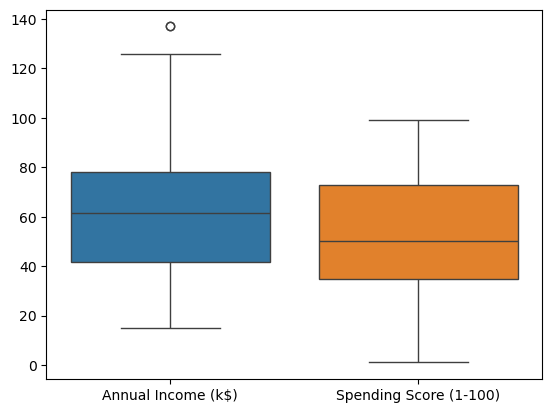

In [16]:
# Diagramas de caja para cada variable
sns.boxplot(data=df)

se observa que solo en "Annual income" se enceuntra un outlier pero es cercano a los valores tratados, entonces no se realiza una limpieza por valores extraños en la data

In [18]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


Se realiza proceso de estandarización de las variables para poder proceseguir con el analisis y tener unas variables que tengan el mismo peso

## K-means

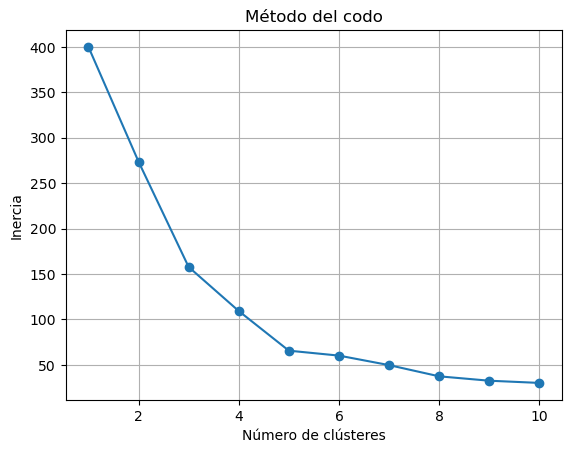

In [21]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


Se observa que en 5 cluster ya la variacion respecto a la inercia disminuye notablemente, por esto, gracias al metodo del codo se escogen 5 closter

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


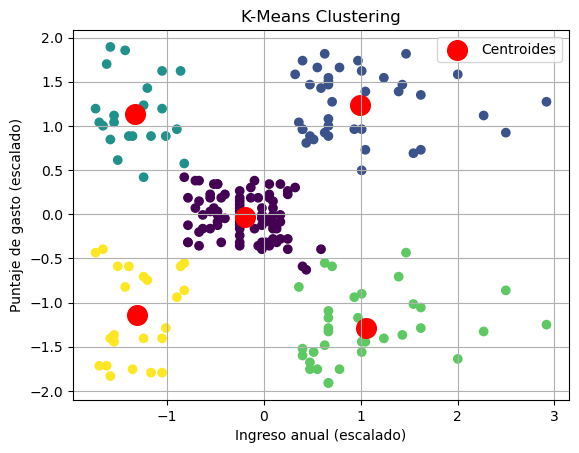

In [24]:

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title("K-Means Clustering")
plt.xlabel("Ingreso anual (escalado)")
plt.ylabel("Puntaje de gasto (escalado)")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X_scaled, y_kmeans))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X_scaled, y_kmeans))
print("Inercia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Índice de Davies-Bouldin:", metrics.davies_bouldin_score(X_scaled, y_kmeans))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357
Inercia (suma de cuadrados dentro de los clusters): 65.5684081557168
Índice de Davies-Bouldin: 0.5722356162263352


Las métricas indican una segmentación efectiva. El puntaje de silueta de 0.55 sugiere que la mayoría de los puntos están bien agrupados. El índice de Calinski-Harabasz elevado y el valor bajo del índice Davies-Bouldin confirman que los clústeres están bien definidos y separados entre sí. La baja inercia refuerza la compacidad interna de los grupos.

## Clustering Jerárquico: Dendrograma

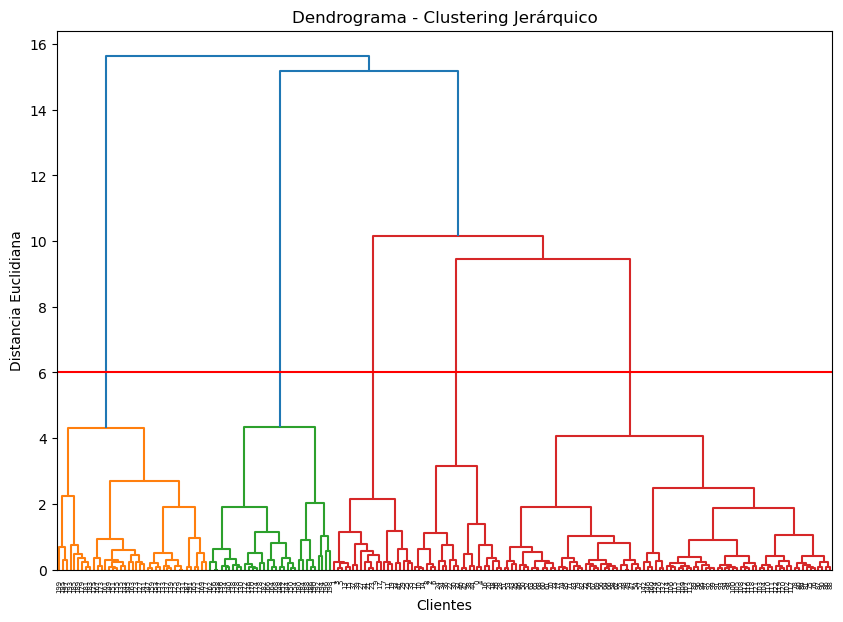

In [28]:
ward_clustering = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(ward_clustering)
plt.axhline(y = 6, color = 'r', linestyle = '-')
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [29]:
hier_clustering = AgglomerativeClustering(n_clusters=5)
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

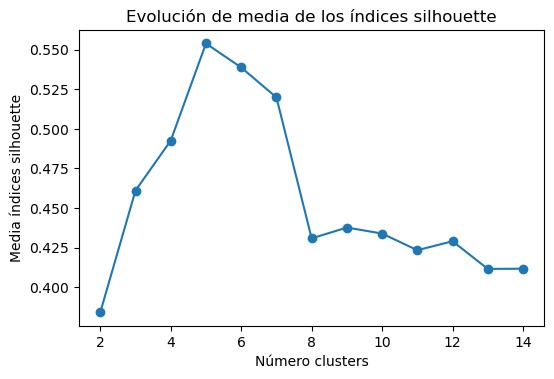

In [30]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                  
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Se puede observar que el utilizando el metodo de silhouette, la cantidad optima es 5 cluster

In [32]:
 # Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Silhouette Score:", silhouette_score(X_scaled, y_hc))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, y_hc))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, y_hc))


Medidas de calidad para Clustering Jerárquico:
Silhouette Score: 0.5538089226688662
Calinski-Harabasz Index: 244.41032586596822
Davies-Bouldin Index: 0.5778621190740154


Se tiene el valor de Silhouette que es el valor del mayor pico, el cual, para este caso se da en nuemeos de cluster=5, segun el indice de Calinski tiene un valor alto y esto es lo deseado, como ultimo tenemos el indice de DAvies, el cual busca un valir bajo. El modelo de Clustering Jerárquico presneta unos indices  muy similares a los obtenidos con K-Means, al observar que estos datos son similares, se refuerza la confiabilidad del agrupamiento realizado.

In [34]:
# Calcular el coeficiente de correlación cofenética

# Compute the distances
X_dist = pdist(X_scaled)
# Compute the linkage matrix
Z = linkage(X_scaled, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.7209128193077099, array([10.14126314,  3.15032521, 10.14126314, ..., 15.62483742,
        0.68237721, 15.62483742]))


El coeficiente de correlación cofenética es de 0.72, lo que indica que el dendrograma que se genero por el modelo jerárquico esta de forma adecuada. 